# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 9381 Судаков Евгений Вариант 62.

## Цель работы 

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

# Основные теоретические положения.

### Бинарное возведение в степень

Бинарное (двоичное) возведение в степень — это приём, позволяющий возводить любое число в n-ую степень за $O(\log n)$ умножений (вместо n умножений при обычном подходе).

Прием заключается в следующем: степень, в которую возводят число представляют в двоичном виде. Далее, первая единица отбрасывается, а каждая единица заменяется на две операции: - умножение текущего числа на само себя, и умножение на $x$. Каждый $0$- просто умножение на само себя.

Введем следующие функции: 

$\lambda(n)=\lfloor log_2(n) \rfloor$,

$\nu(n)$ - вес Хэмминга (количество ненулевых цифр в бинарной записи числа)

Известно, что итоговое количество операций (умножений) в бинарном методе определяется следующей формулой:

$$ l(n) = \lambda(n) + \nu(n) - 1$$

### Метод множителей

Метод заключается в разложении степени $n$, в которую необходимо число на произведение $n = i*j$, 

где $i$ - 
минимальный нетривиальный простой делитель числа n.


Далее бинарным методом вычисляются $ y = x^i$ и $n = y ^ j$.

Если n - простое число, то метод нужно запускать на числе (n-1) с дальнейшим домножением на x.

### Аддитивные цепочки

$\textbf{Def. :}$ Аддитивной цепочкой для некоторого $n \in \mathbb{N}$ называют последовательность натуральных чисел 

$$1 = a_0, a_1, a_2, ..., a_m = n$$

Со следующим свойством : $a_i = a_j + a_k, k \leq j < i, \forall i = 1...m $

То есть $\forall$ член цепочки(кроме первого) равен сумме двух предыдущих.

Пусть $l(n)$ - длина аддитивной цепочки для числа n.

$\textbf{Типы шагов}$

$i$-ый шаг АЦ называется
1) Удвоение, если $j = k = i - 1$. Максимальный $a_i = 2a_{i-1}$

2) Звездный, если $j = i - 1, k \in [0, i-1]$

3) Малый, если $\lambda(a_i) = \lambda(a_{i-1})$.


### Теорема Брауэра

При некотором $k < \log_2 \log_2 n $ выполняется 

$$l(n) < (1 + k^{-1})\lceil\log_2 n \rceil + 2^{k-1} - k + 2$$

Пусть $ k = \lambda(\lambda(n)) -  2\lambda(\lambda(\lambda(n)))  $

Тогда верны 2 следствия:

1)  $$\lim_{n\to\infty} \frac{l(n)}{\lambda(n)} = 1$$

2) Наилучшая верхняя оценка длины АЦ:

$$ 
l(n) \sim \lambda(n) \left( 1 + \frac{1}{\lambda(\lambda(n))} + \frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2} \right)  $$

### Алгоритм Яо

Дано: n - число для построения АЦ, и некоторый параметр $k \geq 2$

n в свою очередь раскладывается в $$n = \sum_{i=0}^j a_i2^{ik}, a_j \neq 0$$

Введем функцию $d(z) - $ сумма $2^{ik}, $ где для всех $i : a_i = z$  

Первым шагом алгоритм строит цепочку из двоек степени до $\lambda(n)$ включительно:

$$Y_k(n) = 1,2,4,8, ..., 2^{\lambda(n)}$$

Далее алгоритм вычисляет $d(z)$ для всех $z \in \{1,2,3,.., 2^{k-1}\}, d(z) \neq 0$

Следующий шаг заключается в умножении каждого d(z) на свой z :  $z*d(z) \forall z$

Цепочка $Y_k(n)$ бинарным методом дополняется этими zd(z), причем сумма всех z*d(z) = n

$$n = \sum_{z=1}^{2^{k-1}}z*d(z)$$

### Алгоритм дробления индексов

Алгоритм дробления вектора индексов является точным алгоритмом и находит минимальную звёздную цепочку для числа $ n $.

Введём определение вектора индексов: $\exists \text{ звёздная цепочка } l^*(n) = m, {\{a_i\}}_{i=1}^m, a_1 = 1$, тогда можно задать вектор индексов ${\{r_i\}}_{i=1}^{m-1}\text{, где } r_i = \{x: 1\leqslant x\leqslant i\}$. Шаг звёздной цепочки можно переписать следуюшим образом: $a_i = a_{i-1} + a_{r_{i-1}}\text{, где }2\leqslant i\leqslant m$.

Наибольшая звёздная цепочка $S_{max} = \{1, 2, 4, 8, ..., 2^m\}$ соответсвует вектору индексов $r_{max} = \{1, 2, 3, 4, ..., m-1\}$. Наименьшая звёздная цепочка $S_{min} = \{1, 2, 3, 4, ..., m\}$ соответсвует вектору индексов $r_{min} = \{1, 1, 1, 1, ..., 1\}$.

Будем считать, что $r = {\{r_i\}}_{i=1}^{m-1}$, больше чем $\tilde r = {\{\tilde r_i\}}_{i=1}^{m-1}$, если $r_1 = \tilde r_1$, $r_2 = \tilde r_2$, $r_3 = \tilde r_3$, $r_{i-1} = \tilde r_{i-1}$, ..., $r_i > \tilde r_i$

Нахождение минимальной длины звёздной цепочки происходит с помощью перебора. Вектор индексов разбивается на два вектора: $r = {\{r_i\}}_{i=1}^{q}$ - фиксированный вектор, $\rho = {\{\rho_j\}}_{j=q+1}^{m-1}$ меняющийся вектор. Можно заметить, что наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1, q+2, ..., m-1\}, \ a_{min} = a_{q+1}\cdot2^{m-q}$. 

Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{1, 1, ..., 1\}, \ a_{max} = a_{q+1}+m-q$.

$\textbf{Алгоритм}$

Вектор индексов разбивается на фиксированный и меняющийся. Вычисляется $a_{min}\text{ и }a_{max}$. Если $n\notin[a_{min}, a_{max}]$, то осуществляется переход к следующему фиксированному вектору. Если для заданной длины не нашлось аддитивной цепочки, то длина цепочки увеличивается. Длина аддитивной цепочки $m\in[ \underline{l}(n),\overline{l}(n)],\text{ где } \underline{l}(n)=\lceil log_2 n \rceil, \overline{l}(n)=\lambda(n)+\nu(n)-1$

### Гипотеза Шольца-Брауэра

$l^*(2^n-1)\leqslant l^*(n)+n-1$

где $l^*(n)$ - длина звёздной цепочки, $l^*(n)\geqslant l(n)$


# Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

### Порядок выполнения работы


1) Применить бинарный метод и метод множителей для $x^n$, где $n\geq30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2) Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3) Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4) Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

5) Проверить гипотезу Шольца–Брауэра для $1<n⩽10$ на алгоритме дробления вектора индексов. Сделать выводы.

6) Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

# Выполнение работы

### 1. Бинарный метод и метод множителей

Возьмем $x = 30, 37, 65$

1) $x^{30}$

#### Бинарный метод

$30_{10} = 11110_2$

Отбрасываем первую единицу, остальные заменяем операциями в соответствии с правилом.

$x, x*x, x^2 * x, x^3 * x^3, x^6 * x, x^7 * x^7, x^{14}*x, x^{15}*x^{15} = x^{30} - 7 \text{ операций}$



#### Проверка
$l(30) = \lambda(30) + \nu(30) - 1 = 4 + 4 - 1 = 7$

#### Метод множителей


$30 = 3 * 10$
$x^{30} = (x^{3})^{10}$

$3_{10} = 11_{2} \rightarrow x, x*x, x^2 * x = x^{3} - 2 \text{ операции}$ 

$10_{10} = 1010_{2} \rightarrow x, x*x, x^2 * x^2, x^4 *x, x^5 * x^5 = x^{10} - 4 \text{ операции}$


#### Проверка
$l(3 * 10) = \lambda(3) + \nu(3) - 1 + \lambda(10) + \nu(10) - 1 = 1 + 2 - 1 + 3 + 2 - 1 = 6$ 

2) $x^{37}$
#### Бинарный метод

$37_10 = 100101_2$

$x, x*x, x^2 * x^2, x^4 * x^4, x^8 * x, x^9 * x^9, x^{18} * x^{18}, x^{36} * x = x^{37} - 7 \text{ операций}$


#### Проверка
$l(37)  = \lambda(37) + \nu(37) - 1 = 5 + 3 - 1 = 7 $

#### Метод множителей

$37 = 36 + 1$
$36 = 3 * 12$

$3_{10} = 11_{2} \rightarrow x, x*x, x^2 * x = x^{3} - 2 \text{ операции}$ 

$12_{10} = 1100_{2}$
$x, x*x, x^2 * x, x^3 * x^3, x^6 * x^6 = x^{12}  - 4 \text{ операции}$


#### Проверка

$2 + 4 + 1 = 7$( еще одна операция на *x)

$l(3 * 12) = \lambda(3) + \nu(3) - 1 + \lambda(12) + \nu(12) - 1 = 1 + 2 - 1 + 3 + 2 - 1 + 1 = 6 + 1 = 7$

3) $x^{65}$

#### Бинарный метод

$65_{10} = 1000001_2$

$x, x*x, x^2 * x^2, x^4 * x^4, x^8 * x^8, x^{16} * x^{16}, x^{32} * x^{32}, x^{64} * x  = x^{65}  - 7 \text{ операций}$

#### Проверка

$l(65) = \lambda(65) + \nu(65) - 1 = 6 + 2 - 1 = 7$

#### Метод множителей

$65 = 5 * 13$

$5_{10} = 101_{2} \rightarrow x, x*x, x^2 * x^2, x^4 * x - 3 \text { операции} $

$13 = 12 + 1$

$12_{10} = 1100_{2}$
$x, x*x, x^2 * x, x^3 * x^3, x^6 * x^6 = x^{12}  - 4 \text{ операции}$

#### Проверка

$3 + 4 + 1 = 8$ (+ 1 еще одна операция на *x)

$l(5 * 12) = \lambda(5) + \nu(5) - 1 + + \lambda(12) + \nu(12) - 1  = 2 + 2 - 1 + 3 + 2 - 1 + 1 = 7 + 1 = 8 $

### Вывод

Исследование показало, что при $n = 2^k+1$ бинарный метод превосходит метод множителей. В остальных случаях метод множителей выполняется за такое же число операций или быстрее.

### Алгоритм Яо

In [ ]:
from math import floor
from math import log


def _lambda(n):
    return floor(log(n, 2))


def _nu(n):
    return bin(n).count("1")


def base_decomposition(decimal_number, base):
    # разложение числа в СС 2^k.
    # Возвращает набор коэффициентов разложения - массив z
    remainder_stack = []

    while decimal_number > 0:
        remainder = decimal_number % base
        remainder_stack.append(remainder)
        decimal_number = decimal_number // base

    new_digits = []
    while remainder_stack:
        new_digits.append(remainder_stack.pop())
    new_digits.reverse()
    return new_digits


def dz(yao_chain, coeffs, z, k):
    _dz = 0
    for i in range(len(coeffs)):
        if coeffs[i] == z:
            _dz += 2 ** (i * k)
            if _dz not in yao_chain:
                yao_chain.append(_dz)
    return _dz


def binary_expand(dz, z):
    bin_pow = bin(z)[3:]
    add_chain = [dz]
    cur_pow = dz
    for bit in bin_pow:
        cur_pow *= 2
        add_chain.append(cur_pow)
        if bit == '1':
            cur_pow += dz
            add_chain.append(cur_pow)
    return add_chain


def yao(n, k):
    yao_chain = [2 ** i for i in range(_lambda(n) + 1)]
    coeffs = base_decomposition(n, 2 ** k)
    sum_zdz = 0
    for z in range(1, 2 ** k):
        _dz = dz(yao_chain, coeffs, z, k)
        if _dz != 0:
            to_add = binary_expand(_dz, z)
            for i in range(len(to_add)):
                if to_add[i] not in yao_chain:
                    yao_chain.append(to_add[i])
            sum_zdz += to_add[-1]
            if sum_zdz not in yao_chain:
                yao_chain.append(sum_zdz)
    yao_chain.sort()
    return yao_chain


if __name__ == '__main__':
    pass

In [ ]:

n=int(input("Введите n : "))
k=int(input("Введите k : "))
res = yao(n, k)
print("Итоговая АЦ : {}".format(res))
print("Длина АЦ : {}".format(len(res)))

Для n : 3412

| k | длина | минимальная длина | цепочка |
| :- | :- | :- | :- |
| 3 | 18 | 15 | [1, 2, 4, 8, 16, 20, 32, 64, 128, 256, 320, 340, 512, 1024, 1536, 2048, 3072, 3412]
| 4 | 19 | 15   | [1, 2, 4, 8, 16, 32, 64, 80, 84, 128, 256, 512, 768, 1024, 1536, 2048, 3072, 3328, 3412]
| 5 | 20 | 15 | [1, 2, 4, 5, 8, 10, 16, 20, 32, 64, 128, 160, 256, 320, 512, 1024, 2048, 3072, 3392, 3412]
|   |    |    |
 

Для n : 27182

| k | длина | минимальная длина | цепочка |
| :- | :- | :- | :- |
| 3 | 24 | 18 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 520, 1024, 1040, 2048, 2080, 2600, 4096, 4097, 8192, 8194, 12291, 16384, 24582, 27182]
| 4 | 26 | 18 | [1, 2, 3, 4, 6, 7, 8, 14, 16, 32, 64, 128, 256, 512, 1024, 1280, 2048, 2560, 4096, 8192, 12288, 16384, 24576, 24608, 27168, 27182]
| 5 | 27 | 18 | [1, 2, 3, 4, 6, 7, 8, 14, 16, 32, 64, 128, 256, 512, 544, 558, 1024, 2048, 3072, 4096, 6144, 8192, 12288, 13312, 16384, 26624, 27182]

Для n : 25
    
| k | длина | минимальная длина | цепочка |
| :- | :- | :- | :- |
 | 2 | 7 | 6 | [1, 2, 4, 8, 16, 17, 25]
 | 3 | 7 | 6 | [1, 2, 4, 8, 16, 24, 25]
| 4 | 7 | 6 | [1, 2, 4, 8, 9, 16, 25]
 

#### Вывод:
Алгоритм Яо действительно строит аддитивные цепочки для заданных n и k, однако, полученные цепочки не обязательно минимальны - только при маленьких значениях n алгоритм способен выдавать цепочки, близкие к оптимальным. 

### Алгоритм алгоритм дробления вектора индексов

In [2]:
import time
from math import floor
from math import log
from math import ceil


def _lambda(n):
    return floor(log(n, 2))


def _nu(n):
    return bin(n).count("1")


def next_iteration(index_vector, start):
    # изначально вектор индексов выглядит как [1,1,1,1...]
    # на кадой итерации алгоритм пытается увеличить последний доступный индекс на 1,
    # когда все элементы ВИ уже максимальны, в конец пушится еще 1 индекс со значением 1

    cur_max_index = start + len(index_vector) - 1
    for i in range(1, len(index_vector) + 1):
        index_vector[-i] += 1
        if index_vector[-i] > cur_max_index:
            if i == len(index_vector):
                index_vector.append(1)
                break
            index_vector[-i] = 1
            cur_max_index -= 1
        else:
            break


def create_chain(chain, index_vector):
    for i in index_vector:
        chain.append(chain[-1] + chain[i - 1])
    return chain


def make_chain(r_vector, ro_vector):
    l_part = create_chain([1], r_vector)
    return create_chain(l_part, ro_vector)


def index_vector_split(n):
    upper_l = _lambda(n) + _nu(n) - 1
    lower_l = int(log(n, 2))
    if lower_l == log(n, 2):
        lower_l -= 1
    while lower_l <= upper_l:
        q = lower_l // 2
        if not q:
            q = 1
        r_vector = [1 for i in range(q)]
        while len(r_vector) == q:
            ro_vector = [1 for q in range(lower_l - q)]
            chain = make_chain(r_vector, ro_vector)
            if chain[-1] == n:
                return chain
            a_max = chain[q] * 2 ** (lower_l - q)
            a_min = chain[q] + lower_l - q
            if n < a_min or n > a_max:
                next_iteration(r_vector, 1)
                continue
            while len(ro_vector) == lower_l - q:
                chain = make_chain(r_vector, ro_vector)
                if chain[-1] == n:
                    return chain
                next_iteration(ro_vector, q + 1)
            next_iteration(r_vector, 1)
        lower_l += 1

In [24]:

if __name__ == "__main__":
    n = int(input("Введите N: "))
    start = time.time()
    add_chain = index_vector_split(n)
    end = time.time()
    print("Время выполнения:", end - start, "секунд")
    print("Аддитивная цепочка:", add_chain)
    print("Длина аддитивной цепочки:", len(add_chain))


Введите N: 25
Время выполнения: 0.00034809112548828125 секунд
Аддитивная цепочка: [1, 2, 3, 5, 10, 15, 25]
Длина аддитивной цепочки: 7


В таблице ниже приведены результаты для некоторых n

    
| k | время, с | длина | цепочка |
| :- | :- | :- | :- |
| 501| 130| 13 | [1, 2, 3, 4, 7, 10, 20, 40, 80, 87, 167, 334, 501]
| 512| 0.02| 10 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
| 612| 203| 13 | [1, 2, 3, 5, 7, 12, 19, 38, 76, 152, 304, 309, 613]
| 998 | 1598 | 14 | [1, 2, 3, 4, 7, 14, 17, 31, 62, 124, 248, 251, 499, 998]

Далее приведена таблица сравнения длин АЦ алгоритма дробления вектора индексов с алгоритмом Яо и бинарным методом

| n | Яо | ДВИ | Бинарный метод | 
| :- | :- | :- | :- |
| 501 |15 | 13 | 14 |
| 512 |10 | 10 | 9 |
| 612 |14 | 13 | 13 |
| 998 |17 | 14 | 15 |

### Проверка следствия теоремы Брауера

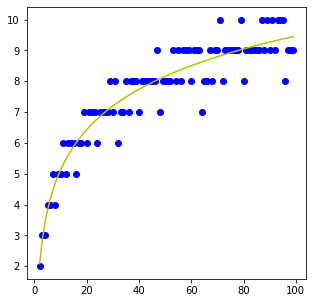

In [7]:

import pylab as plt
    
x = [i for i in range(2, 100)]
y = [len(index_vector_split(i)) for i in x]
    
plt.figure(figsize=(5, 5))
plt.scatter(x, y, color='b', marker='o')
m = matrix([[sum([float((log(i)**2)) for i in x]), sum([float(log(i)) for i in x])], 
            [sum([float(log(i)) for i in x]), len(x)]])
vec = vector([sum([float(y[i] * log(x[i])) for i in range(len(x))]), sum(y)])
solution = m.solve_right(vec)
plt.plot(n, [solution[0] * log(i) + solution[1] for i in n], color = 'y')
plt.show()

Таким образом, график наглядно показывает, что график функции l(n) можно аппроксимировать логарфмом, что подтверждает следствие №1 Теоремы Брауэра. $$\lim_{n\to\infty} \frac{l(n)}{\lambda(n)} = 1$$

### Проверка гипотезы Шольца-Брауэра

In [ ]:
tests = [i for i in range(2, 11)]

for t in tests:
    l = len(index_vector_split(2 ** t - 1))
    r = len(index_vector_split(t)) + t - 1
    string = " {} <= {}".format(l, r) if l<= r else " Failed : {} > {}".format(l, r) 
    print("n = {},".format(t) + string)

n = 2, 3 <= 3
n = 3, 5 <= 5
n = 4, 6 <= 6
n = 5, 8 <= 8
n = 6, 9 <= 9
n = 7, 11 <= 11
n = 8, 11 <= 11
n = 9, 13 <= 13
n = 10, 14 <= 14



| Значение $n$ | l^*(2^n-1) | l^*(n) + n - 1 |
| :-: | :-: | :-: |
| 2 | 3 | 3 |
  | 2 | 3 | 3 |
    | 3 | 5 | 5 |
   | 4 | 6 | 6 |
    | 5 | 8 | 8 |
    | 6 | 9 | 9 |
    | 7 | 11 | 11 |
    | 8 | 11 | 11 |
    | 9 | 13 | 13 |
   | 10 | 14 | 14 |



# Вывод

В ходе выполнения практической работы были получены первоначальные навыки работы с математическим пакетом SageMath, а также были изучены и закреплены на практике следующие темы:

    1) Понятие об аддитивный цепочках
    2) Методы построение АЦ : бинарный, множителей
    3) Были реализованы приближенные и точные алгоритмы вычисления АЦ (Яо, ДВИ)
    4) Были проверены следствие №1 теоремы Брауера и гипотеза  Шольца-Брауэра
    5) Был проведен сравнительный анализ некоторых алгоритмов